##  Problem Statement

The goal is to predict House SalePrice.

In [235]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import sys                                                                      # Import packages
import numpy as np


from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                          

from subprocess import check_output

#magic command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'

## Data loading and Description 

In [236]:
#Import the dataset
house_price= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")



## Data PreProcessing 

In [330]:
house_price.columns
house_price.head()
import pandas_profiling  
profile = pandas_profiling.ProfileReport(house_price)
profile.to_file("house_price.html") 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,Lvl,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Lvl,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Lvl,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,Lvl,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000


Below is the Analysis from the preprofiling 

### Missing Values Treatment 

#### Droping High missing and Zero columns 

In [237]:
#Droping High missing and Zero columns with using the above analysis from preprofiling 
house_price.drop([ 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch' , 'ScreenPorch', 'PoolArea', 'MiscVal','Id', 'Street', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'Condition1', 'BldgType', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition' ], axis = 1,inplace = True)


<Figure size 1080x1080 with 0 Axes>

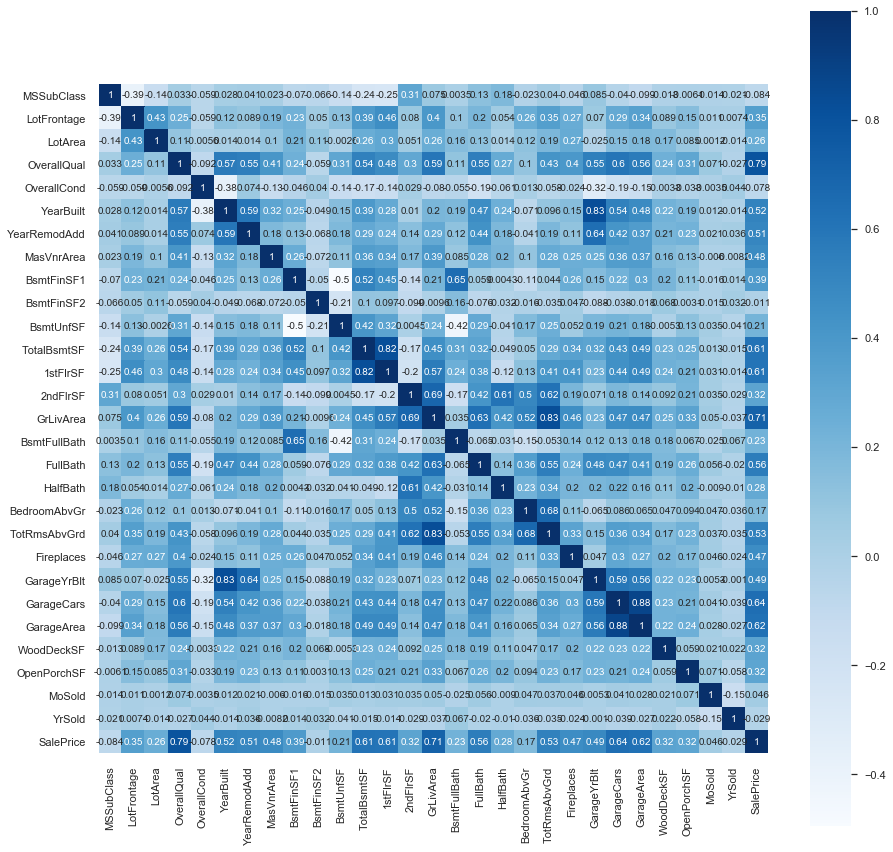

In [238]:
corr = house_price.corr()
#sns.heatmap( house_price.corr(), annot=True );
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

#### Droping the High corrlated Independent varibale and very low corrleation with Dependent varibale/Target Varible SalePrice

In [162]:
#Droping the High corrlated Independent varibale and very low corrleation with Dependent varibale/Target Varible SalePrice
house_price.drop(['GarageYrBlt', 'LotArea', 'BsmtFinSF2', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'GarageArea','1stFlrSF', 'TotRmsAbvGrd','MSSubClass', 'OverallCond','MoSold', 'YrSold'], axis = 1,inplace = True)


<Figure size 1008x1008 with 0 Axes>

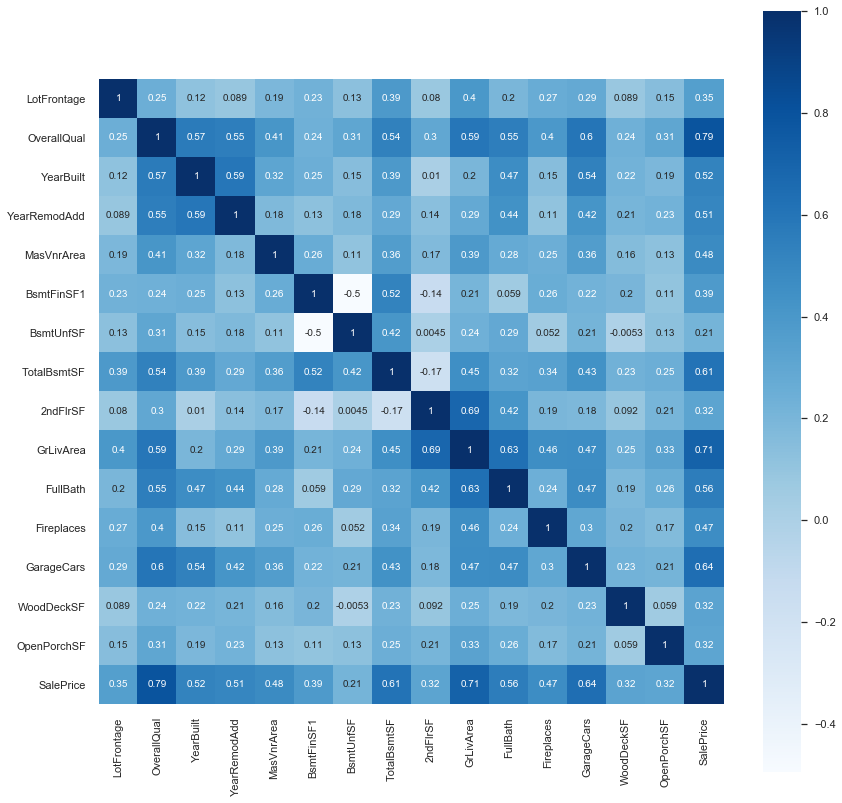

(1460, 38)

In [163]:
corr = house_price.corr()
#sns.heatmap( house_price.corr(), annot=True );
plt.figure(figsize=(14,14))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()
house_price.shape

In [164]:
data = house_price # creating copy of data set

In [165]:
data.head()
data.info()

,MSZoning,LotFrontage,LotShape,LandContour,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,RL,65.0,Reg,Lvl,CollgCr,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,854,1710,2,Gd,0,NaN,Attchd,RFn,2,0,61,208500
1,RL,80.0,Reg,Lvl,Veenker,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,0,1262,2,TA,1,TA,Attchd,RFn,2,298,0,181500
2,RL,68.0,IR1,Lvl,CollgCr,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,866,1786,2,Gd,1,TA,Attchd,RFn,2,0,42,223500
3,RL,60.0,IR1,Lvl,Crawfor,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,756,1717,1,Gd,1,Gd,Detchd,Unf,3,0,35,140000
4,RL,84.0,IR1,Lvl,NoRidge,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1053,2198,2,Gd,1,TA,Attchd,RFn,3,192,84,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotFrontage   1201 non-null   float64
 2   LotShape      1460 non-null   object 
 3   LandContour   1460 non-null   object 
 4   Neighborhood  1460 non-null   object 
 5   HouseStyle    1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   RoofStyle     1460 non-null   object 
 10  Exterior1st   1460 non-null   object 
 11  Exterior2nd   1460 non-null   object 
 12  MasVnrType    1452 non-null   object 
 13  MasVnrArea    1452 non-null   float64
 14  ExterQual     1460 non-null   object 
 15  ExterCond     1460 non-null   object 
 16  Foundation    1460 non-null   object 
 17  BsmtQual      1423 non-null   object 
 18  BsmtCond      1423 non-null 

In [166]:
data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1']] = data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1']].replace(0, np.nan)

In [110]:
print(data.isnull().sum())


MSZoning          0
LotFrontage     259
LotShape          0
LandContour       0
Neighborhood      0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea      869
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1      467
BsmtFinType2     38
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
2ndFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageCars        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64


In [167]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#### Missing Value Teatment using States Mean/Mode,Median 

In [168]:
values = data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1']].values
values


array([[ 65., 196., 706.],
       [ 80.,  nan, 978.],
       [ 68., 162., 486.],
       ...,
       [ 66.,  nan, 275.],
       [ 68.,  nan,  49.],
       [ 75.,  nan, 830.]])

In [169]:
print('Missing: %d' % np.isnan(values).sum())

Missing: 1595


In [170]:
iterative_imp = IterativeImputer(max_iter=10, random_state=0) #applying IterativeImputer
transformed_values = iterative_imp.fit_transform(values)
#knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
#transformed_values = knn_imputer.fit_transform(values)

In [171]:
print('Missing: %d' % np.isnan(transformed_values).sum())
print(values)

Missing: 0
[[ 65. 196. 706.]
 [ 80.  nan 978.]
 [ 68. 162. 486.]
 ...
 [ 66.  nan 275.]
 [ 68.  nan  49.]
 [ 75.  nan 830.]]


In [172]:
df = pd.DataFrame(data=transformed_values, columns=['LotFrontagenew', 'MasVnrAreanew', 'BsmtFinSFnew']) #ARRAY TO Datafram transformation
df.head(5)

,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew
0,65.0,196.000000,706.0
1,80.0,295.666212,978.0
2,68.0,162.000000,486.0
3,60.0,172.959623,216.0
4,84.0,350.000000,655.0


In [173]:
#df.set_index('key').join(other.set_index('key'))
datanew=pd.concat([data, df], axis=1)


In [174]:
datanew.drop([ 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1' ], axis = 1,inplace = True) #droping old column for 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1'

In [175]:
datanew.head()

,MSZoning,LotShape,LandContour,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew
0,RL,Reg,Lvl,CollgCr,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,854,1710,2,Gd,0,NaN,Attchd,RFn,2,0,61,208500,65.0,196.000000,706.0
1,RL,Reg,Lvl,Veenker,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,0,1262,2,TA,1,TA,Attchd,RFn,2,298,0,181500,80.0,295.666212,978.0
2,RL,IR1,Lvl,CollgCr,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,866,1786,2,Gd,1,TA,Attchd,RFn,2,0,42,223500,68.0,162.000000,486.0
3,RL,IR1,Lvl,Crawfor,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,756,1717,1,Gd,1,Gd,Detchd,Unf,3,0,35,140000,60.0,172.959623,216.0
4,RL,IR1,Lvl,NoRidge,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,1053,2198,2,Gd,1,TA,Attchd,RFn,3,192,84,250000,84.0,350.000000,655.0


In [176]:
#As below all are Categorical Exp variable hence we are applying FILLNA with Mode

datanew.BsmtQual = data.BsmtQual.fillna(data['BsmtQual'].mode()[0])
datanew.BsmtExposure = data.BsmtExposure.fillna(data['BsmtExposure'].mode()[0])
datanew.BsmtFinType1 = data.BsmtFinType1.fillna(data['BsmtFinType1'].mode()[0])
datanew.GarageType = data.GarageType.fillna(data['GarageType'].mode()[0])
datanew.GarageFinish = data.GarageFinish.fillna(data['GarageFinish'].mode()[0])
datanew.GarageFinish = data.GarageFinish.fillna(data['GarageFinish'].mode()[0])
datanew.GarageFinish = data.GarageFinish.fillna(data['GarageFinish'].mode()[0])
datanew.MasVnrType = data.MasVnrType.fillna(data['MasVnrType'].mode()[0])
datanew.FireplaceQu = data.MasVnrType.fillna(data['FireplaceQu'].mode()[0])
datanew.BsmtFinType2 = data.MasVnrType.fillna(data['BsmtFinType2'].mode()[0])
datanew.BsmtCond = data.MasVnrType.fillna(data['BsmtCond'].mode()[0])

In [177]:
print(datanew.isnull().sum())

MSZoning          0
LotShape          0
LandContour       0
Neighborhood      0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
2ndFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageCars        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
LotFrontagenew    0
MasVnrAreanew     0
BsmtFinSFnew      0
dtype: int64


In [178]:
#f, axes = plt.subplots( figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
#sns.despine(left=True)
#data['SalePrice'] = np.log(data['SalePrice'])
#sns.distplot(data.SalePrice, color="b")

### Feature Engineering 

In [179]:
datanew.describe()

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,567.240411,1057.429452,346.992466,1515.463699,1.565068,0.613014,1.767123,94.244521,46.660274,180921.195890,70.093212,242.293719,647.572724
std,1.382997,30.202904,20.645407,441.866955,438.705324,436.528436,525.480383,0.550916,0.644666,0.747315,125.338794,66.256028,79442.502883,22.229503,135.468510,350.988124
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,21.000000,1.000000,2.000000
25%,5.000000,1954.000000,1967.000000,223.000000,795.750000,0.000000,1129.500000,1.000000,0.000000,1.000000,0.000000,0.000000,129975.000000,60.000000,180.000000,443.750000
50%,6.000000,1973.000000,1994.000000,477.500000,991.500000,0.000000,1464.000000,2.000000,1.000000,2.000000,0.000000,25.000000,163000.000000,70.000000,231.793263,612.450612
75%,7.000000,2000.000000,2004.000000,808.000000,1298.250000,728.000000,1776.750000,2.000000,1.000000,2.000000,168.000000,68.000000,214000.000000,80.000000,265.085196,784.000000
max,10.000000,2010.000000,2010.000000,2336.000000,6110.000000,2065.000000,5642.000000,3.000000,3.000000,4.000000,857.000000,547.000000,755000.000000,313.000000,1600.000000,5644.000000


In [180]:

#market_df[(market_df['Employees'] >=15) & (market_df['State'] != 'CA 94119')]
datanew['premium_house'] = (datanew['FullBath'] > 2) &  (datanew['GarageCars'] > 2)

In [181]:
datanew.head()

,MSZoning,LotShape,LandContour,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew,premium_house
0,RL,Reg,Lvl,CollgCr,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,No,GLQ,BrkFace,150,856,Ex,854,1710,2,Gd,0,BrkFace,Attchd,RFn,2,0,61,208500,65.0,196.000000,706.0,False
1,RL,Reg,Lvl,Veenker,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,None,Gd,ALQ,None,284,1262,Ex,0,1262,2,TA,1,None,Attchd,RFn,2,298,0,181500,80.0,295.666212,978.0,False
2,RL,IR1,Lvl,CollgCr,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,Mn,GLQ,BrkFace,434,920,Ex,866,1786,2,Gd,1,BrkFace,Attchd,RFn,2,0,42,223500,68.0,162.000000,486.0,False
3,RL,IR1,Lvl,Crawfor,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,None,No,ALQ,None,540,756,Gd,756,1717,1,Gd,1,None,Detchd,Unf,3,0,35,140000,60.0,172.959623,216.0,False
4,RL,IR1,Lvl,NoRidge,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,Av,GLQ,BrkFace,490,1145,Ex,1053,2198,2,Gd,1,BrkFace,Attchd,RFn,3,192,84,250000,84.0,350.000000,655.0,False


### Checking Assumptions and post Data processing

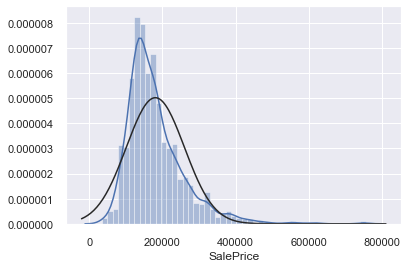

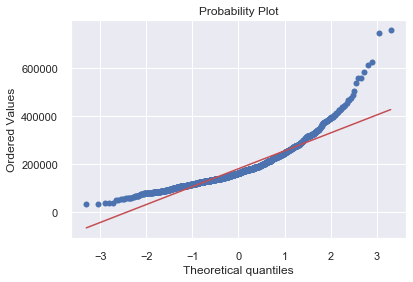

In [182]:
from scipy.stats import norm
from scipy import stats
#data['SalePrice'] = np.log(data['SalePrice'])
sns.distplot(datanew['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(datanew['SalePrice'], plot=plt)

#### Transform the TV SalePrice

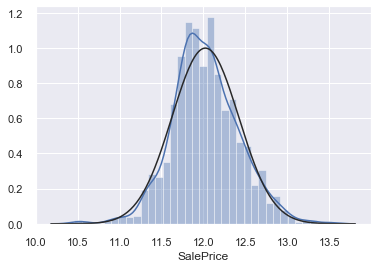

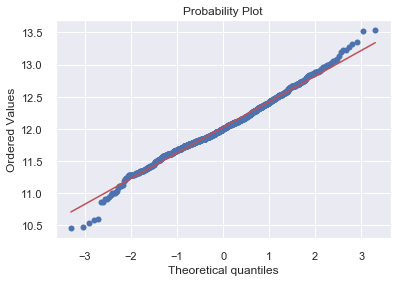

In [183]:
# Transform the TV SalePrice

from scipy.stats import norm
datanew['SalePrice'] = np.log(datanew['SalePrice'])
sns.distplot(datanew['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(datanew['SalePrice'], plot=plt)

### Feature Selection 

In [184]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

In [185]:
#datanew1=datanew old
datafea=datanew

In [186]:
datafea.head()

,MSZoning,LotShape,LandContour,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew,premium_house
0,RL,Reg,Lvl,CollgCr,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,No,GLQ,BrkFace,150,856,Ex,854,1710,2,Gd,0,BrkFace,Attchd,RFn,2,0,61,12.247694,65.0,196.000000,706.0,False
1,RL,Reg,Lvl,Veenker,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,None,Gd,ALQ,None,284,1262,Ex,0,1262,2,TA,1,None,Attchd,RFn,2,298,0,12.109011,80.0,295.666212,978.0,False
2,RL,IR1,Lvl,CollgCr,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,Mn,GLQ,BrkFace,434,920,Ex,866,1786,2,Gd,1,BrkFace,Attchd,RFn,2,0,42,12.317167,68.0,162.000000,486.0,False
3,RL,IR1,Lvl,Crawfor,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,None,No,ALQ,None,540,756,Gd,756,1717,1,Gd,1,None,Detchd,Unf,3,0,35,11.849398,60.0,172.959623,216.0,False
4,RL,IR1,Lvl,NoRidge,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,BrkFace,Av,GLQ,BrkFace,490,1145,Ex,1053,2198,2,Gd,1,BrkFace,Attchd,RFn,3,192,84,12.429216,84.0,350.000000,655.0,False


#### one Hot encoading on Categorical Exp. varibles 

In [187]:
#start from here 14june
datafea= pd.get_dummies(datafea, columns=['MSZoning','LotShape','LandContour' ,'Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'HeatingQC', 'KitchenQual','GarageType','FireplaceQu','GarageType', 'GarageFinish', 'premium_house'], drop_first=True)


In [188]:
datafea.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,...,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_BrkFace,BsmtCond_None,BsmtCond_Stone,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BrkFace,BsmtFinType2_None,BsmtFinType2_Stone,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,FireplaceQu_BrkFace,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,premium_house_True
0,7,2003,2003,150,856,854,1710,2,0,2,0,61,12.247694,65.0,196.000000,706.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,6,1976,1976,284,1262,0,1262,2,1,2,298,0,12.109011,80.0,295.666212,978.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,7,2001,2002,434,920,866,1786,2,1,2,0,42,12.317167,68.0,162.000000,486.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,7,1915,1970,540,756,756,1717,1,1,3,0,35,11.849398,60.0,172.959623,216.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,8,2000,2000,490,1145,1053,2198,2,1,3,192,84,12.429216,84.0,350.000000,655.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [189]:
datafea['SalePricenew1']=datafea['SalePrice']


In [190]:
datafea.drop([ 'SalePrice' ], axis = 1,inplace = True)

In [191]:
datafea.head()
datafea.info()

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,LotFrontagenew,MasVnrAreanew,BsmtFinSFnew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_BrkFace,BsmtCond_None,BsmtCond_Stone,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BrkFace,BsmtFinType2_None,BsmtFinType2_Stone,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,FireplaceQu_BrkFace,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,premium_house_True,SalePricenew1
0,7,2003,2003,150,856,854,1710,2,0,2,0,61,65.0,196.000000,706.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,12.247694
1,6,1976,1976,284,1262,0,1262,2,1,2,298,0,80.0,295.666212,978.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,12.109011
2,7,2001,2002,434,920,866,1786,2,1,2,0,42,68.0,162.000000,486.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,12.317167
3,7,1915,1970,540,756,756,1717,1,1,3,0,35,60.0,172.959623,216.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,11.849398
4,8,2000,2000,490,1145,1053,2198,2,1,3,192,84,84.0,350.000000,655.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,12.429216


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 178 entries, OverallQual to SalePricenew1
dtypes: float64(4), int64(12), uint8(162)
memory usage: 413.6 KB


#### Feature Exteration and Selection

In [192]:
#Feature Exteration
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
array = datafea.values

In [193]:
X = array[:, 0:177]
Y = array[:, 177]

In [194]:
print(Y)

[12.248 12.109 12.317 ... 12.493 11.864 11.902]


In [195]:
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

In [196]:
np.set_printoptions(precision=3)
print(fit.scores_)

[2.931e+03 7.648e+02 6.858e+02 7.557e+01 8.737e+02 1.655e+02 1.408e+03
 7.981e+02 4.593e+02 1.258e+03 1.832e+02 1.676e+02 2.006e+02 1.513e+02
 2.811e+02 2.141e+01 7.658e+00 1.430e+02 2.002e+02 2.326e+01 2.077e+00
 1.335e+02 1.816e+01 2.135e+00 1.481e-01 4.895e-01 2.334e+01 4.627e+01
 8.378e+00 2.069e+01 1.112e+01 6.840e+01 9.137e+00 8.375e+01 3.327e+01
 2.583e+00 4.170e+01 1.410e+00 5.485e+00 1.217e+02 2.059e+02 8.312e+01
 5.509e+00 2.240e+01 1.712e+00 4.376e+01 5.200e+01 2.870e+01 7.148e+00
 1.648e+01 8.389e+00 1.464e+00 9.234e-01 1.084e+02 1.354e+01 2.043e-01
 5.386e+01 3.572e+00 5.964e+01 4.907e-02 1.038e+00 1.639e+00 9.463e+00
 1.333e+00 1.341e+00 1.316e+01 8.586e+00 1.282e+00 4.514e+01 2.153e-01
 2.350e+00 2.783e+00 1.857e+02 5.361e+01 5.362e+00 8.693e-01 4.748e+00
 2.813e-01 1.341e+00 1.251e+01 3.654e+00 2.948e+00 4.229e+01 2.644e+00
 8.467e-01 4.959e-01 4.865e+00 1.874e+02 5.083e+01 4.258e+00 1.639e+00
 9.463e+00 1.333e+00 1.341e+00 1.316e+01 8.586e+00 1.282e+00 4.514e+01
 2.153

In [197]:
feature_names = datafea.iloc[:, 0:177].columns

In [198]:
print(feature_names)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars',
       ...
       'FireplaceQu_None', 'FireplaceQu_Stone', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'premium_house_True'],
      dtype='object', length=177)


In [199]:
for score, name in sorted(zip(fit.scores_, feature_names), reverse=True):
    print('Feature Score of', name, ':', score)

Feature Score of OverallQual : 2930.795149319135
Feature Score of GrLivArea : 1408.1190513887927
Feature Score of GarageCars : 1258.3490433975796
Feature Score of TotalBsmtSF : 873.7106389737805
Feature Score of ExterQual_TA : 802.7268194607467
Feature Score of FullBath : 798.0998172148173
Feature Score of YearBuilt : 764.7800241576073
Feature Score of GarageFinish_Unf : 718.4799679994746
Feature Score of YearRemodAdd : 685.840903328047
Feature Score of BsmtQual_TA : 595.1297080444618
Feature Score of KitchenQual_TA : 594.6515660033275
Feature Score of Foundation_PConc : 572.0500426889696
Feature Score of ExterQual_Gd : 511.65411656266895
Feature Score of Fireplaces : 459.31290172077576
Feature Score of BsmtFinType1_GLQ : 351.5443011271038
Feature Score of KitchenQual_Gd : 288.78716479618805
Feature Score of BsmtFinSFnew : 281.11777779539955
Feature Score of FireplaceQu_None : 270.16941926205095
Feature Score of BsmtFinType2_None : 270.16941926205095
Feature Score of BsmtCond_None : 27

In [200]:
features = fit.transform(X)

In [201]:
print(features[0:15, :])

[[7.000e+00 8.560e+02 1.710e+03 2.000e+00]
 [6.000e+00 1.262e+03 1.262e+03 2.000e+00]
 [7.000e+00 9.200e+02 1.786e+03 2.000e+00]
 [7.000e+00 7.560e+02 1.717e+03 3.000e+00]
 [8.000e+00 1.145e+03 2.198e+03 3.000e+00]
 [5.000e+00 7.960e+02 1.362e+03 2.000e+00]
 [8.000e+00 1.686e+03 1.694e+03 2.000e+00]
 [7.000e+00 1.107e+03 2.090e+03 2.000e+00]
 [7.000e+00 9.520e+02 1.774e+03 2.000e+00]
 [5.000e+00 9.910e+02 1.077e+03 1.000e+00]
 [5.000e+00 1.040e+03 1.040e+03 1.000e+00]
 [9.000e+00 1.175e+03 2.324e+03 3.000e+00]
 [5.000e+00 9.120e+02 9.120e+02 1.000e+00]
 [7.000e+00 1.494e+03 1.494e+03 3.000e+00]
 [6.000e+00 1.253e+03 1.253e+03 1.000e+00]]


In [202]:
afterfea=datafea

In [203]:
#afterfea1= datafea[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual_TA', 'FullBath', 'YearBuilt','KitchenQual_TA', 'GarageFinish_Unf', 'YearRemodAdd', 'BsmtQual_TA', 'Foundation_PConc', 'Fireplaces', 'ExterQual_Gd', 'BsmtFinSFnew', 'SalePricenew1']]

afterfea1= datafea[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual_TA', 'FullBath', 'YearBuilt','KitchenQual_TA', 'GarageFinish_Unf', 'YearRemodAdd', 'BsmtQual_TA', 'SalePricenew1']]


In [204]:
afterfea1.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,ExterQual_TA,FullBath,YearBuilt,KitchenQual_TA,GarageFinish_Unf,YearRemodAdd,BsmtQual_TA,SalePricenew1
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,0.620548,1.565068,1971.267808,0.503425,0.469863,1984.865753,0.469863,12.024051
std,1.382997,525.480383,0.747315,438.705324,0.485417,0.550916,30.202904,0.500160,0.499262,20.645407,0.499262,0.399452
min,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,1950.000000,0.000000,10.460242
25%,5.000000,1129.500000,1.000000,795.750000,0.000000,1.000000,1954.000000,0.000000,0.000000,1967.000000,0.000000,11.775097
50%,6.000000,1464.000000,2.000000,991.500000,1.000000,2.000000,1973.000000,1.000000,0.000000,1994.000000,0.000000,12.001505
75%,7.000000,1776.750000,2.000000,1298.250000,1.000000,2.000000,2000.000000,1.000000,1.000000,2004.000000,1.000000,12.273731
max,10.000000,5642.000000,4.000000,6110.000000,1.000000,3.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,13.534473


#### Handeling Outlieries 

TotalBsmtSF, GrLivArea

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Values')

Text(0.5, 1.0, 'Box for GrLivArea')

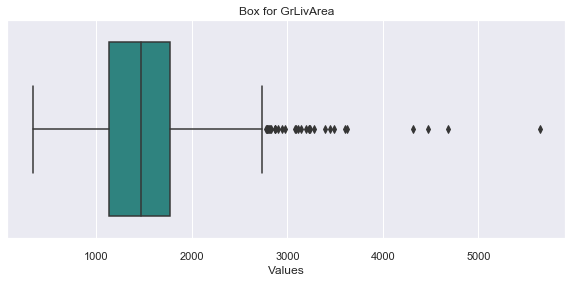

In [206]:
plt.figure(figsize=(10, 4))
sns.boxplot(afterfea1['GrLivArea'], palette='viridis')
plt.xlabel('Values')
plt.title('Box for GrLivArea')

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Values')

Text(0.5, 1.0, 'Box Plot for TotalBsmtSF')

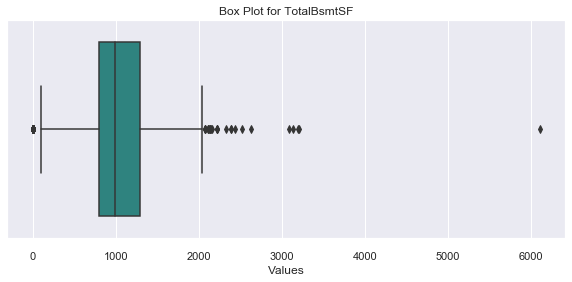

In [207]:
plt.figure(figsize=(10, 4))
sns.boxplot(afterfea1['TotalBsmtSF'], palette='viridis')
plt.xlabel('Values')
plt.title('Box Plot for TotalBsmtSF')

In [208]:
#Inter quartile range for quantile values outside 25 to 75 range. And do the outlier capping for lower level with min value and for upper level with 'q3=1.5*iqr' value
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lower_bound = df_in[col_name].min()
    upper_bound = q3+1.5*iqr
    print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]
    return df_out

In [209]:
#TotalBsmtSF, GrLivArea
def log(bank):
    return remove_outlier(afterfea1, 'TotalBsmtSF')
afterfea12 = log(data) 

Column TotalBsmtSF IQR lower bound and upper bound are 0 and 2052.0 respectively


In [210]:
def log(bank):
    return remove_outlier(afterfea12, 'GrLivArea')
afterfea1 = log(data) 

Column GrLivArea IQR lower bound and upper bound are 438 and 2716.75 respectively


In [211]:
afterfea1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1369 non-null   int64  
 1   GrLivArea         1369 non-null   int64  
 2   GarageCars        1369 non-null   int64  
 3   TotalBsmtSF       1369 non-null   int64  
 4   ExterQual_TA      1369 non-null   uint8  
 5   FullBath          1369 non-null   int64  
 6   YearBuilt         1369 non-null   int64  
 7   KitchenQual_TA    1369 non-null   uint8  
 8   GarageFinish_Unf  1369 non-null   uint8  
 9   YearRemodAdd      1369 non-null   int64  
 10  BsmtQual_TA       1369 non-null   uint8  
 11  SalePricenew1     1369 non-null   float64
dtypes: float64(1), int64(7), uint8(4)
memory usage: 101.6 KB


<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Values')

Text(0.5, 1.0, 'TotalBsmtSF box Plot after outlier Handeling ')

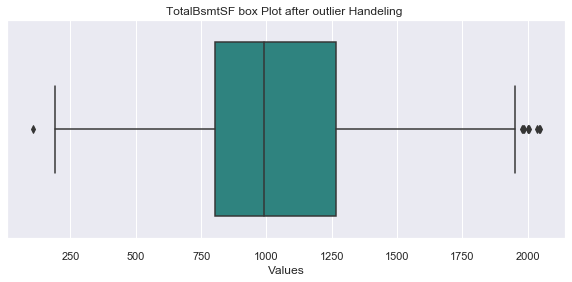

In [212]:
plt.figure(figsize=(10, 4))
sns.boxplot(afterfea1['TotalBsmtSF'], palette='viridis')
plt.xlabel('Values')
plt.title('TotalBsmtSF box Plot after outlier Handeling ')

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Values')

Text(0.5, 1.0, 'GrLivArea Box plot after Outlier handeling ')

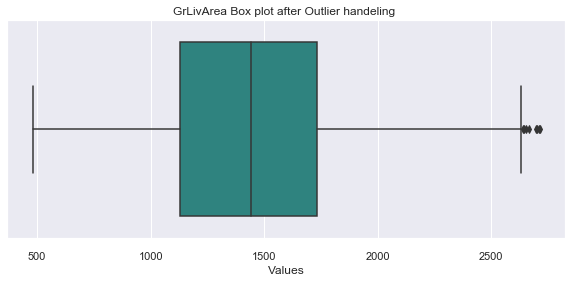

In [213]:
plt.figure(figsize=(10, 4))
sns.boxplot(afterfea1['GrLivArea'], palette='viridis')
plt.xlabel('Values')
plt.title('GrLivArea Box plot after Outlier handeling ')

In [214]:
afterfea1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1369 non-null   int64  
 1   GrLivArea         1369 non-null   int64  
 2   GarageCars        1369 non-null   int64  
 3   TotalBsmtSF       1369 non-null   int64  
 4   ExterQual_TA      1369 non-null   uint8  
 5   FullBath          1369 non-null   int64  
 6   YearBuilt         1369 non-null   int64  
 7   KitchenQual_TA    1369 non-null   uint8  
 8   GarageFinish_Unf  1369 non-null   uint8  
 9   YearRemodAdd      1369 non-null   int64  
 10  BsmtQual_TA       1369 non-null   uint8  
 11  SalePricenew1     1369 non-null   float64
dtypes: float64(1), int64(7), uint8(4)
memory usage: 101.6 KB


#### Check Exp Variable linearity with TV

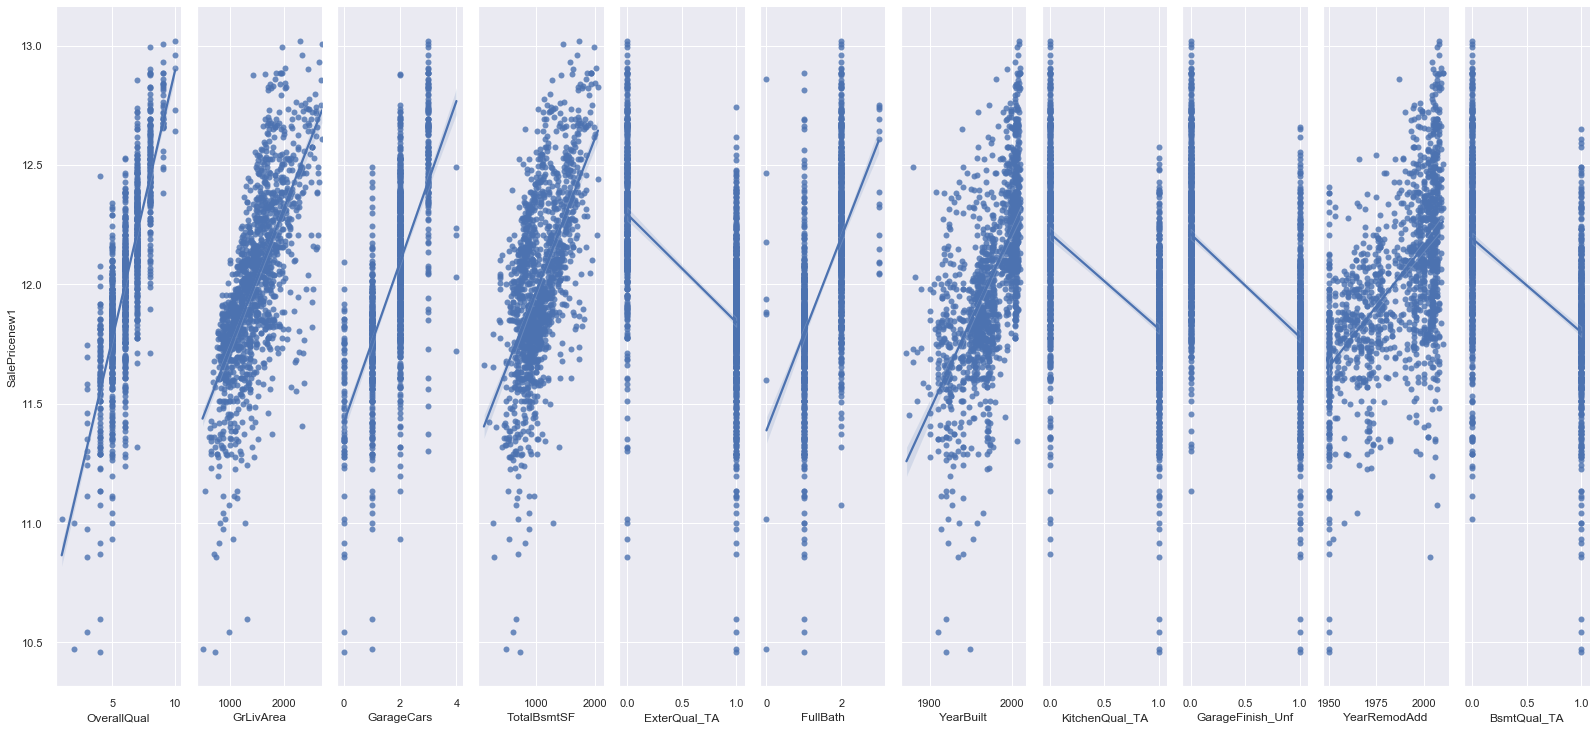

In [215]:
sns.pairplot(afterfea1, x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual_TA', 'FullBath', 'YearBuilt','KitchenQual_TA', 'GarageFinish_Unf', 'YearRemodAdd', 'BsmtQual_TA'], y_vars='SalePricenew1', size=10, aspect=.2, kind='reg')
#plt.title('Pair Plot')

#sns.pairplot(data_final1, x_vars=[ 'OverallQual', 'YearBuilt','YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath','Fireplaces','GarageCars'], y_vars='SalePrice', size=10, aspect=.2, kind='reg')



 standardize the variable for model building (return value will be numpy.ndarray)
 

In [216]:
finaldatacopy=afterfea1

In [217]:
finaldatacopy.head()
#"OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF", "GrLivArea", "FullBath", "Fireplaces", "GarageCars", "SalePrice", "ExterQual_Gd", "Foundation_CBlock", "BsmtFinType1_GLQ"


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,ExterQual_TA,FullBath,YearBuilt,KitchenQual_TA,GarageFinish_Unf,YearRemodAdd,BsmtQual_TA,SalePricenew1
0,7,1710,2,856,0,2,2003,0,0,2003,0,12.247694
1,6,1262,2,1262,1,2,1976,1,0,1976,0,12.109011
2,7,1786,2,920,0,2,2001,0,0,2002,0,12.317167
3,7,1717,3,756,1,1,1915,0,1,1970,1,11.849398
4,8,2198,3,1145,0,2,2000,0,0,2000,0,12.429216


#### Scaling of Exp varibles 

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(finaldatacopy)
data_final1 = scaler.transform(finaldatacopy)
data_scaler = pd.DataFrame(data_final1)
data_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.722380,0.548620,0.342391,-0.572897,-1.299841,0.872051,1.046972,-1.021413,-0.936971,0.876426,-0.931487,0.649914
1,-0.053258,-0.473262,0.342391,0.612753,0.769325,0.872051,0.150887,0.979036,-0.936971,-0.437946,-0.931487,0.271041
2,0.722380,0.721975,0.342391,-0.385996,-1.299841,0.872051,0.980595,-1.021413,-0.936971,0.827746,-0.931487,0.839707
3,0.722380,0.564587,1.708959,-0.864928,0.769325,-1.005053,-1.873602,-1.021413,1.067269,-0.730029,1.073553,-0.438203
4,1.498018,1.661742,1.708959,0.271076,-1.299841,0.872051,0.947407,-1.021413,-0.936971,0.730385,-0.931487,1.145818


In [219]:
data_scaler.columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual_TA', 'FullBath', 'YearBuilt','KitchenQual_TA', 'GarageFinish_Unf', 'YearRemodAdd', 'BsmtQual_TA', 'SalePricenew1']


In [220]:
data_scaler.head()
data_scaler.info()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,ExterQual_TA,FullBath,YearBuilt,KitchenQual_TA,GarageFinish_Unf,YearRemodAdd,BsmtQual_TA,SalePricenew1
0,0.722380,0.548620,0.342391,-0.572897,-1.299841,0.872051,1.046972,-1.021413,-0.936971,0.876426,-0.931487,0.649914
1,-0.053258,-0.473262,0.342391,0.612753,0.769325,0.872051,0.150887,0.979036,-0.936971,-0.437946,-0.931487,0.271041
2,0.722380,0.721975,0.342391,-0.385996,-1.299841,0.872051,0.980595,-1.021413,-0.936971,0.827746,-0.931487,0.839707
3,0.722380,0.564587,1.708959,-0.864928,0.769325,-1.005053,-1.873602,-1.021413,1.067269,-0.730029,1.073553,-0.438203
4,1.498018,1.661742,1.708959,0.271076,-1.299841,0.872051,0.947407,-1.021413,-0.936971,0.730385,-0.931487,1.145818


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1369 non-null   float64
 1   GrLivArea         1369 non-null   float64
 2   GarageCars        1369 non-null   float64
 3   TotalBsmtSF       1369 non-null   float64
 4   ExterQual_TA      1369 non-null   float64
 5   FullBath          1369 non-null   float64
 6   YearBuilt         1369 non-null   float64
 7   KitchenQual_TA    1369 non-null   float64
 8   GarageFinish_Unf  1369 non-null   float64
 9   YearRemodAdd      1369 non-null   float64
 10  BsmtQual_TA       1369 non-null   float64
 11  SalePricenew1     1369 non-null   float64
dtypes: float64(12)
memory usage: 128.5 KB


Preparing X and y using pandas

In [221]:
X = data_scaler.loc[:,data_scaler.columns != 'SalePricenew1']
X.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,ExterQual_TA,FullBath,YearBuilt,KitchenQual_TA,GarageFinish_Unf,YearRemodAdd,BsmtQual_TA
0,0.722380,0.548620,0.342391,-0.572897,-1.299841,0.872051,1.046972,-1.021413,-0.936971,0.876426,-0.931487
1,-0.053258,-0.473262,0.342391,0.612753,0.769325,0.872051,0.150887,0.979036,-0.936971,-0.437946,-0.931487
2,0.722380,0.721975,0.342391,-0.385996,-1.299841,0.872051,0.980595,-1.021413,-0.936971,0.827746,-0.931487
3,0.722380,0.564587,1.708959,-0.864928,0.769325,-1.005053,-1.873602,-1.021413,1.067269,-0.730029,1.073553
4,1.498018,1.661742,1.708959,0.271076,-1.299841,0.872051,0.947407,-1.021413,-0.936971,0.730385,-0.931487


In [222]:
y = data_scaler.SalePricenew1 
y.head()

0    0.649914
1    0.271041
2    0.839707
3   -0.438203
4    1.145818
Name: SalePricenew1, dtype: float64

#### Splitting X and y into training and test datasets.

In [223]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)

(1095, 11)
(1095,)


##  Applying ML Algo 

###  Applying Random Forest in scikit-learn

In [224]:
from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators=300, random_state=0)
#regressor.fit(X_train, y_train)

#from sklearn.ensemble import RandomForestClassifier

Regmodel = RandomForestRegressor(random_state = 0)

Regmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Model with parameters specified

In [225]:
Regmodel1 = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

Regmodel1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Using the Model for Prediction

In [226]:

regy_pred_train = Regmodel.predict(X_train)
regy_pred_test = Regmodel.predict(X_test) 

regy_pred_train1 = Regmodel1.predict(X_train)                                                        # make predictions on the testing set
regy_pred_test1 = Regmodel1.predict(X_test)

#### RMSE Results of RandomForest

In [227]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, regy_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, regy_pred_test))
RMSE_train
RMSE_test

0.15239344212299513

0.5034047723729107

In [228]:
RMSE_train1 = np.sqrt( metrics.mean_squared_error(y_train, regy_pred_train1))
RMSE_test1 = np.sqrt(metrics.mean_squared_error(y_test, regy_pred_test1))
RMSE_train
RMSE_test

0.15239344212299513

0.5034047723729107

###  Applying Liner regression Model


In [229]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
#RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### RMSE Results of LR

In [230]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [231]:
RMSE_train

0.38692604957637566

In [232]:
RMSE_test

0.4820477058010919

#### LR Model r_squared and adjusted_r_squared for Train and Test

In [233]:
#r_squared and adjusted_r_squared for Train 
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8429928718103961 0.8413981549035765


In [234]:
#r_squared and adjusted_r_squared for Test 
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8029748304708575 0.7947027813684889


#### Predict new result

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Blue for Test and Red for Train')

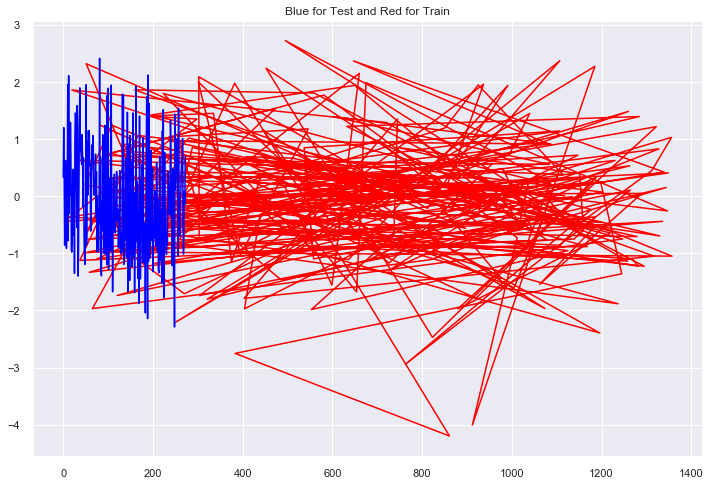

In [158]:
# Predict new result

# Plot y_test vs y_pred
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred_test, color='blue')
plt.title('Blue for Test and Red for Train')

## Conclusion/insights 

* Results are not good with Randomforest Regression, RMSE values are very poor for the Test dataset

Below are the insights for the LR Model
* with LR RMSE Test is .38 and RMSE Test is 0.48
RMSE Range goes from 0 to 1, it is not that small anymore. However, although the smaller the RMSE, the better,
* adjusted_r_squared for Test 0.79 and Train is .0.80
 R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in)
 
* Hence LR model is good for this Data set
* However, We can increase the model performance by haneling adding the more Exp. varible but therir could be changes of Overfitting 